In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('IAP.csv')

In [3]:
data

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,04/03/2019,6000,8000,7000
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,04/03/2019,4500,5500,5000
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,04/03/2019,6000,8000,7000
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,04/03/2019,6000,8000,7000
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,04/03/2019,110000,130000,120000
...,...,...,...,...,...,...,...,...,...
2233,West Bengal,Uttar Dinajpur,Islampur,Potato,Jyoti,04/03/2019,530,570,550
2234,West Bengal,Uttar Dinajpur,Islampur,Rice,Other,04/03/2019,3550,3650,3600
2235,West Bengal,Uttar Dinajpur,Raiganj,Jute,TD-5,04/03/2019,4400,4600,4500
2236,West Bengal,Uttar Dinajpur,Raiganj,Rice,Other,04/03/2019,3450,3550,3500


In [4]:
print(f'The data set contains {data.shape[1]} columns and {data.shape[0]} rows')

The data set contains 9 columns and 2238 rows


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   state         2238 non-null   object
 1   district      2238 non-null   object
 2   market        2238 non-null   object
 3   commodity     2238 non-null   object
 4   variety       2238 non-null   object
 5   arrival_date  2238 non-null   object
 6   min_price     2238 non-null   int64 
 7   max_price     2238 non-null   int64 
 8   modal_price   2238 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 157.5+ KB


In [6]:
data.isna().sum()/len(data)*100

state           0.0
district        0.0
market          0.0
commodity       0.0
variety         0.0
arrival_date    0.0
min_price       0.0
max_price       0.0
modal_price     0.0
dtype: float64

## Data Preprocessing

In [7]:
print('The Average values of the minimum price',data['min_price'].mean())
print('The Average values of the maximum price',data['max_price'].mean())

The Average values of the minimum price 2456.230563002681
The Average values of the maximum price 2855.890527256479


In [8]:
# Checking the Stastics in the data
data.describe().style.background_gradient(cmap='gist_yarg_r') 

,min_price,max_price,modal_price
count,2238.000000,2238.000000,2238.000000
mean,2456.230563,2855.890527,2698.865952
std,3452.497680,3917.251520,3694.830905
min,0.000000,0.000000,2.000000
25%,800.000000,1000.000000,950.000000
50%,1700.000000,1960.000000,1831.500000
75%,3200.000000,3700.000000,3500.000000
max,110000.000000,130000.000000,120000.000000


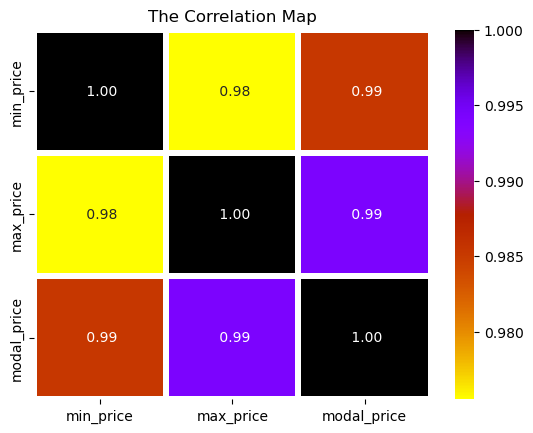

In [9]:
# Checking the Correlation map using the heatmap
sns.heatmap(data.corr(),annot=True,cmap='gnuplot_r',fmt=' .2f',linewidths=3)
plt.title("The Correlation Map")
plt.show()

## Explore Data Analysis

# Questions Asked from the Data

-> To find the unique states in the data, you can use the unique() function      on the 'State' column:
-> To visualize the usage of states in the data, you can use the                value_counts() function on the 'State' column and plot it as a bar chart.
-> To visualize the top 10 districts in the data, you can use the                value_counts function on the 'District' column, retrieve the top 10          districts, and plot them as a bar chart.
-> To find the market that generated the most revenue, you can calculate the    total revenue for each market and plot it as a pie chart.
-> To visualize the distribution of maximum, minimum, and model prices, you      can create a histogram for each using the hist() function.
-> To analyze the relationship between the minimum and modal prices, you can    create a scatter plot using the plot() function:
-> To create a data frame for visualizing the average prices of commodities      along with the minimum, maximum, and modal prices, you can use the            groupby() function and aggregate the data.
-> To visualize the percentage of the top 10 commodities in the data, you can    calculate the percentage and plot it as a pie chart.
-> To find the revenue generated by each state and visualize it as a bar        chart, you can multiply the minimum and maximum prices and plot the bar      chart.

In [10]:
# Some Intresting Question asked the Data
# What are the Unique states in the Data
States_in_data=data['state'].unique()
print('\nThe States in the data',States_in_data)
dominate_state=data['state'].value_counts().idxmax()
print('\nThe Dominate_state', dominate_state)
less_dominate_state=data['state'].value_counts().idxmin()
print('\nThe Less dominate_state', less_dominate_state)
max_and_min_price=(data['min_price'].min(),data['max_price'].max())
print('\nThe minimum price range between', max_and_min_price)
most_commodity=data['commodity'].value_counts().idxmax()
print('\nThe most demanading commodity in the data', most_commodity)
min_commodity=data['commodity'].value_counts().idxmin()
print('\nThe less demanading commodity in the data', min_commodity)


The States in the data ['Andaman and Nicobar' 'Andhra Pradesh' 'Assam' 'Chattisgarh' 'Goa'
 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya' 'Nagaland'
 'Odisha' 'Pondicherry' 'Punjab' 'Rajasthan' 'Tamil Nadu' 'Telangana'
 'Tripura' 'Uttar Pradesh' 'Uttrakhand' 'West Bengal']

The Dominate_state Uttar Pradesh

The Less dominate_state Jammu and Kashmir

The minimum price range between (0, 130000)

The most demanading commodity in the data Potato

The less demanading commodity in the data Gingelly Oil


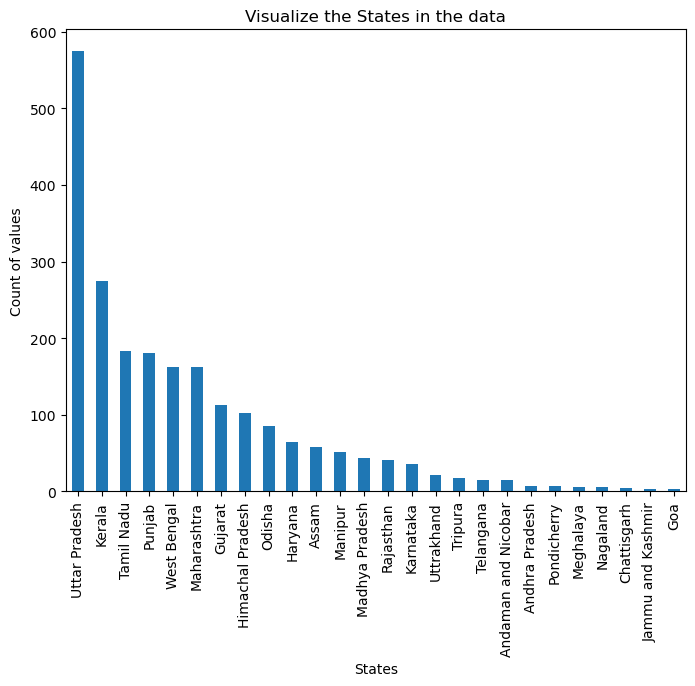

In [11]:
# Create bar chart for States
data['state'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',title="Visualize the States in the data",figsize=(8,6))
plt.xlabel("States")
plt.ylabel("Count of values")
plt.show()

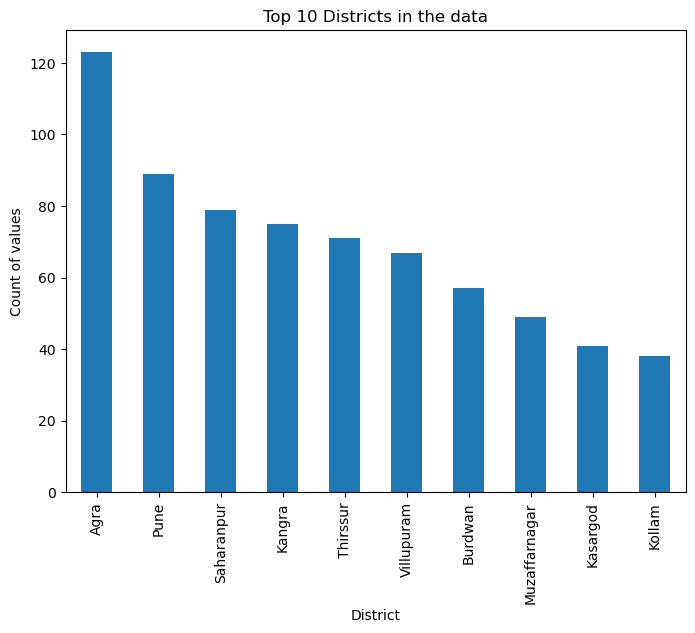

In [12]:
# Create a bar chart find the top 10 district in the data
data['district'].value_counts().nlargest(10).sort_values(ascending=False)\
.plot(kind='bar',title='Top 10 Districts in the data',figsize=(8,6))
plt.xlabel("District")
plt.ylabel("Count of values")
plt.show()

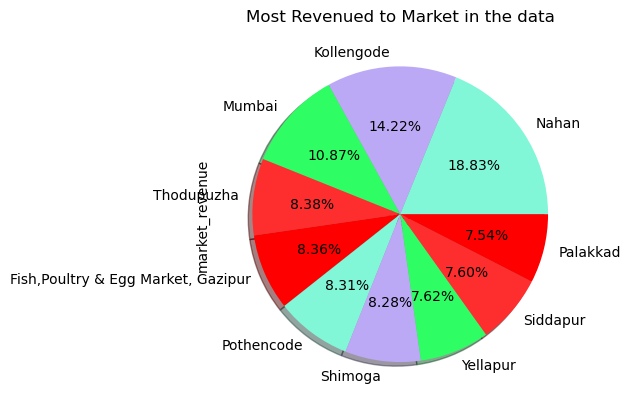

In [13]:
# Calculate the most revenue generate in the market
data['market_revenue']=data['min_price']+data['max_price']+data['modal_price']
label=['Nahan','Kollengode','Mumbai','Thodupuzha','Fish,Poultry & Egg Market, Gazipur','Pothencode','Shimoga','Yellapur','Siddapur','Palakkad']
data.groupby('market')['market_revenue'].sum().sort_values(ascending=False).head(10)\
.plot(kind='pie',labels=label,
     colors=['#81F7D8','#BCA9F5','#2EFE64','#FE2E2E','#FF0000'],
     autopct='%1.2f%%',
     shadow=True)
plt.title("Most Revenued to Market in the data")
plt.show()

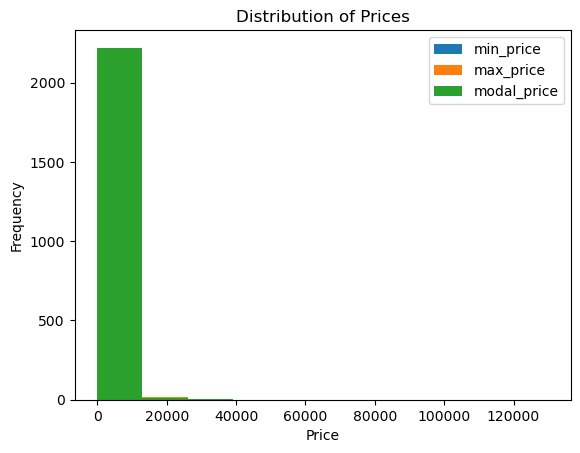

In [14]:
# Create a histogram with minimum and maximum and modal price
data[['min_price','max_price','modal_price']].plot(kind='hist')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

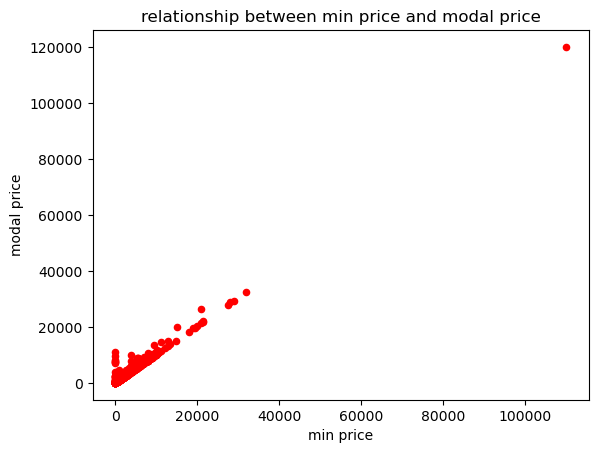

In [15]:
# Create scatter plot for min and modal price
data.plot.scatter(x='min_price',y='modal_price',color='red')
plt.xlabel('min price')
plt.ylabel('modal price')
plt.title('relationship between min price and modal price')
plt.show()

In [16]:
# Find the Average price of the top 10 commodity in the data
avg_prices=data.groupby('commodity')['min_price','max_price','modal_price']
avg_prices.head(10).style.background_gradient(cmap='tab20b')

,min_price,max_price,modal_price
0,6000,8000,7000
1,4500,5500,5000
2,6000,8000,7000
3,6000,8000,7000
4,110000,130000,120000
5,3000,4000,3500
6,7000,8000,7500
7,6000,7000,6500
8,9000,11000,10000
9,10000,12000,11000


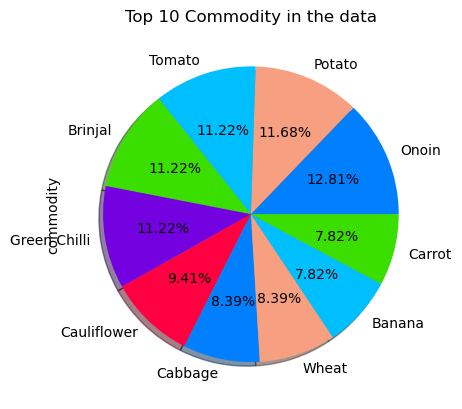

In [17]:
# Create a pie chart to visualize the top 10 commoditys in the data
color=['#0080FF','#F79F81','#00BFFF','#3ADF00','#7401DF','#FF0040']
label=['Onoin','Potato','Tomato','Brinjal','Green Chilli','Cauliflower','Cabbage','Wheat','Banana','Carrot']
data['commodity'].value_counts().sort_values(ascending=False).head(10)\
.plot(kind='pie',labels=label,
     colors=color,
     autopct='%1.2f%%',
     shadow=True)
plt.title("Top 10 Commodity in the data")
plt.show()

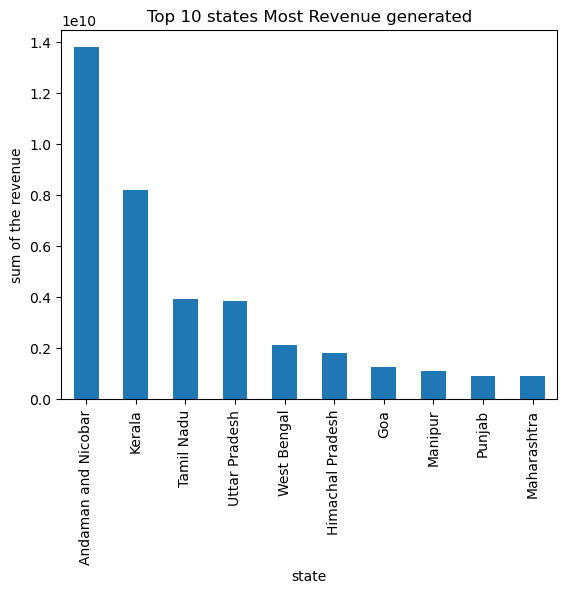

In [18]:
# To calculated the most Revenue generated states
data['revenue']=data['min_price']*data['modal_price']
data.groupby('state')['revenue'].sum().sort_values(ascending=False).head(10)\
.plot(kind='bar',title='Top 10 states Most Revenue generated')
plt.xlabel('state')
plt.ylabel('sum of the revenue')
plt.show()